# I. Data Preprocessing

## Part 1: Load the data from the CSV into a DataFrame. 

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('dog_rates_tweets.csv')
# Adapted from https://www.jianshu.com/p/f80586446151?ivk_sa=1024320u.

In [3]:
data

,id,created_at,text
0,994677639364403200,2018-05-10 20:36:44,@Steff88979267 tell them to h*ck off
1,994364904978239488,2018-05-09 23:54:02,@NFLOwnerGBP take it back
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...
3,994336722875047936,2018-05-09 22:02:03,@rachaellanaghan ❤️
4,994024065982717952,2018-05-09 01:19:40,This is Captain Jack Wobbles. He is currently ...
...,...,...,...
11710,1091789851282665472,2019-02-02 20:05:59,This is Cadogan. He’s had the same morning rou...
11711,1091772144927666176,2019-02-02 18:55:38,@mayapolarbear 6/5 stars
11712,1091425960606367745,2019-02-01 20:00:01,@Acallofthevoid 🤗
11713,1091417463512678400,2019-02-01 19:26:15,@jaytay777 OLIVER!!! you’re doing so well budd...


## Part 2: Find tweets that contain an “n/10” rating. Extract the numeric rating. Exclude tweets that don't contain a rating.

In [4]:
import re

In [5]:
matching = data.text.str.extract(r'(\d+(\.\d+)?)/10', expand = True)
# Adapted from https://chrisalbon.com/python/data_wrangling/pandas_regex_to_create_columns/

In [6]:
matching

,0,1
0,NaN,NaN
1,NaN,NaN
2,14,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
11710,NaN,NaN
11711,NaN,NaN
11712,NaN,NaN
11713,NaN,NaN


In [7]:
rating = matching[matching[0].notnull()][0]

In [8]:
rating = pd.to_numeric(rating)

In [9]:
rating

2        14.0
7        13.0
8        14.0
24       13.0
30       13.0
         ... 
11631    15.0
11638    14.0
11665    13.0
11666    13.0
11672    12.0
Name: 0, Length: 1877, dtype: float64

In [10]:
data['rating'] = rating

In [11]:
data

,id,created_at,text,rating
0,994677639364403200,2018-05-10 20:36:44,@Steff88979267 tell them to h*ck off,NaN
1,994364904978239488,2018-05-09 23:54:02,@NFLOwnerGBP take it back,NaN
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0
3,994336722875047936,2018-05-09 22:02:03,@rachaellanaghan ❤️,NaN
4,994024065982717952,2018-05-09 01:19:40,This is Captain Jack Wobbles. He is currently ...,NaN
...,...,...,...,...
11710,1091789851282665472,2019-02-02 20:05:59,This is Cadogan. He’s had the same morning rou...,NaN
11711,1091772144927666176,2019-02-02 18:55:38,@mayapolarbear 6/5 stars,NaN
11712,1091425960606367745,2019-02-01 20:00:01,@Acallofthevoid 🤗,NaN
11713,1091417463512678400,2019-02-01 19:26:15,@jaytay777 OLIVER!!! you’re doing so well budd...,NaN


## Part 3: Remove outliers: there are a few obvious ones. Exclude rating values that are too large to make sense.

In [12]:
rating = rating[rating < 25]

In [13]:
rating

2        14.0
7        13.0
8        14.0
24       13.0
30       13.0
         ... 
11631    15.0
11638    14.0
11665    13.0
11666    13.0
11672    12.0
Name: 0, Length: 1871, dtype: float64

In [14]:
data['rating'] = rating

In [15]:
data

,id,created_at,text,rating
0,994677639364403200,2018-05-10 20:36:44,@Steff88979267 tell them to h*ck off,NaN
1,994364904978239488,2018-05-09 23:54:02,@NFLOwnerGBP take it back,NaN
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0
3,994336722875047936,2018-05-09 22:02:03,@rachaellanaghan ❤️,NaN
4,994024065982717952,2018-05-09 01:19:40,This is Captain Jack Wobbles. He is currently ...,NaN
...,...,...,...,...
11710,1091789851282665472,2019-02-02 20:05:59,This is Cadogan. He’s had the same morning rou...,NaN
11711,1091772144927666176,2019-02-02 18:55:38,@mayapolarbear 6/5 stars,NaN
11712,1091425960606367745,2019-02-01 20:00:01,@Acallofthevoid 🤗,NaN
11713,1091417463512678400,2019-02-01 19:26:15,@jaytay777 OLIVER!!! you’re doing so well budd...,NaN


In [16]:
data = data.loc[rating.index]

In [17]:
data

,id,created_at,text,rating
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0
...,...,...,...,...
11631,1096203765189726208,2019-02-15 00:25:18,"honorary 15/10 for Oppy, the very good space r...",15.0
11638,1095730341828915200,2019-02-13 17:04:05,This is George. He doesn’t chew socks. He just...,14.0
11665,1093636946046242817,2019-02-07 22:25:41,@Panthers @Proud_KCS 13/10 easy,13.0
11666,1093636812818472960,2019-02-07 22:25:09,RT @GeekandSundry: .@Dog_Rates Announces a New...,13.0


## Part 4: Make sure the 'created_at' column is a datetime value, not a string.

In [18]:
from datetime import datetime

In [19]:
data['created_at'] = pd.to_datetime(data['created_at'], format = "%Y-%m-%d %H:%M:%S")

In [20]:
data

,id,created_at,text,rating
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0
...,...,...,...,...
11631,1096203765189726208,2019-02-15 00:25:18,"honorary 15/10 for Oppy, the very good space r...",15.0
11638,1095730341828915200,2019-02-13 17:04:05,This is George. He doesn’t chew socks. He just...,14.0
11665,1093636946046242817,2019-02-07 22:25:41,@Panthers @Proud_KCS 13/10 easy,13.0
11666,1093636812818472960,2019-02-07 22:25:09,RT @GeekandSundry: .@Dog_Rates Announces a New...,13.0


## Part 5: Create a scatter plot of date vs rating, so you can see what the data looks like.

In [21]:
import matplotlib.pyplot as plt

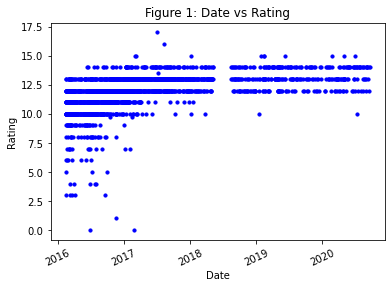

In [22]:
plt.xticks(rotation=25)
plt.scatter(data['created_at'], data['rating'], c = 'b', s = 10)
plt.title('Figure 1: Date vs Rating')
plt.xlabel('Date')
plt.ylabel('Rating')
plt.show()

# II. Linear Fitting

## Part 1: Datetime objects have a .timestamp() method that will give us a number (of seconds after some epoch), but we need to get that into our data before using it. 

In [23]:
def to_timestamp(dataFrame):
    return dataFrame.timestamp()
data['timestamp'] = data['created_at'].apply(to_timestamp)

In [24]:
data

,id,created_at,text,rating,timestamp
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0,1.525910e+09
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0,1.525797e+09
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0,1.525735e+09
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0,1.525394e+09
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0,1.525285e+09
...,...,...,...,...,...
11631,1096203765189726208,2019-02-15 00:25:18,"honorary 15/10 for Oppy, the very good space r...",15.0,1.550190e+09
11638,1095730341828915200,2019-02-13 17:04:05,This is George. He doesn’t chew socks. He just...,14.0,1.550077e+09
11665,1093636946046242817,2019-02-07 22:25:41,@Panthers @Proud_KCS 13/10 easy,13.0,1.549578e+09
11666,1093636812818472960,2019-02-07 22:25:09,RT @GeekandSundry: .@Dog_Rates Announces a New...,13.0,1.549578e+09


## Part 2: A best-fit line.

In [25]:
from scipy import stats

In [26]:
fit = stats.linregress(data['timestamp'].values, data['rating'].values)
# Adapted from https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

In [27]:
data['prediction'] =  data['timestamp'] * fit.slope + fit.intercept

In [28]:
data

,id,created_at,text,rating,timestamp,prediction
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0,1.525910e+09,12.624973
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0,1.525797e+09,12.622373
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0,1.525735e+09,12.620951
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0,1.525394e+09,12.613109
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0,1.525285e+09,12.610619
...,...,...,...,...,...,...
11631,1096203765189726208,2019-02-15 00:25:18,"honorary 15/10 for Oppy, the very good space r...",15.0,1.550190e+09,13.183014
11638,1095730341828915200,2019-02-13 17:04:05,This is George. He doesn’t chew socks. He just...,14.0,1.550077e+09,13.180420
11665,1093636946046242817,2019-02-07 22:25:41,@Panthers @Proud_KCS 13/10 easy,13.0,1.549578e+09,13.168949
11666,1093636812818472960,2019-02-07 22:25:09,RT @GeekandSundry: .@Dog_Rates Announces a New...,13.0,1.549578e+09,13.168949


In [29]:
fit.slope, fit.intercept

(2.2983031752244575e-08, -22.445058882763483)

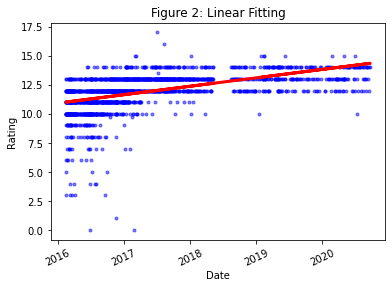

In [30]:
plt.xticks(rotation=25)
plt.plot(data['created_at'].values, data['rating'].values, 'b.', alpha=0.5)
plt.plot(data['created_at'].values, data['prediction'].values, 'r-', linewidth=3)
plt.title('Figure 2: Linear Fitting')
plt.xlabel('Date')
plt.ylabel('Rating')
plt.show()

# III. Dog Rates Significance

In [31]:
print('The p value of fit is %.5g.' % fit.pvalue)

The p value of fit is 3.7938e-121.


In [32]:
if (fit.pvalue < 0.05):
    print('Given the p value is less than the significance level, the slope is different from 0.')
else:
    print('Given the p value is not less than the significance level, the slope is not different from 0.')

Given the p value is less than the significance level, the slope is different from 0.


In [33]:
residual = (data['rating'] - data['prediction'])

In [34]:
residual

2        1.375027
7        0.377627
8        1.379049
24       0.386891
30       0.389381
           ...   
11631    1.816986
11638    0.819580
11665   -0.168949
11666   -0.168949
11672   -1.167190
Length: 1871, dtype: float64

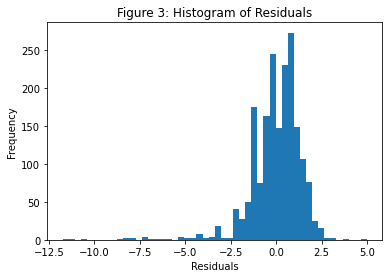

In [35]:
plt.hist(residual, bins = 50)
plt.title('Figure 3: Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# IV. Q&A of Exercise 7

In [36]:
from scipy.stats import t
tinv = lambda p, df: abs(t.ppf(p/2, df))
ts = tinv(0.05, len(data['timestamp'])-2)
# Adapted from https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html .

In [37]:
print(f"slope (95%): {fit.slope:.10f} +/- {ts*fit.stderr:.10f}")
# Adapted from https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html .

slope (95%): 0.0000000230 +/- 0.0000000018


In [38]:
if (fit.slope > ts*fit.stderr):
    print('According to the 95% Confidence Interval, we are 95% confident that the slope is always greater than 0. Hence, the rationgs are increasing.')
else:
    print('According to the 95% Confidence Interval, we are not 95% confident that the slope is always greater than 0. Hence, the rationgs may decrease.')

According to the 95% Confidence Interval, we are 95% confident that the slope is always greater than 0. Hence, the rationgs are increasing.


In [39]:
import statsmodels.api as sm

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 02 Jul 2021   Prob (F-statistic):                nan
Time:                        09:32:44   Log-Likelihood:                -3433.5
No. Observations:                1871   AIC:                             6869.
Df Residuals:                    1870   BIC:                             6875.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           7.98e-09   2.34e-11    340.385      0.0

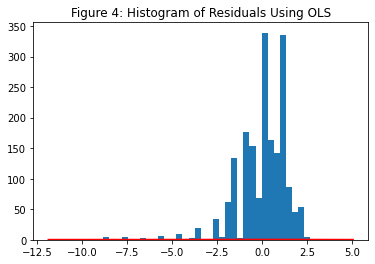

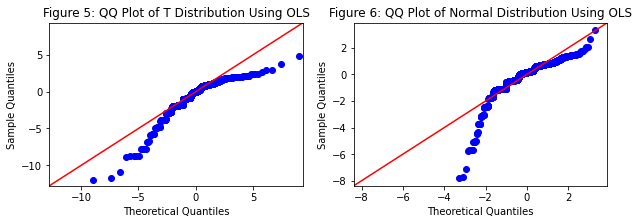

In [40]:
import numpy as np
#fit the variables in to the linear model
model = sm.OLS(data['rating'].values, data['timestamp'].values, hasconst=True).fit()

#print the intercept and regression coefficients
print_model = model.summary()
print(print_model)

#residuals visualization
mu = np.mean(model.resid)
sigma = np.std(model.resid)
pdf = stats.norm.pdf(sorted(model.resid), mu, sigma)
plt.hist(model.resid, bins = 50)
plt.plot(sorted(model.resid), pdf, color= 'r', linewidth = 2)
plt.title('Figure 4: Histogram of Residuals Using OLS')
plt.show()

#qq plot
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(10,3))
sm.qqplot(model.resid, stats.t, fit = True, line = '45', ax = ax1)
ax1.set_title('Figure 5: QQ Plot of T Distribution Using OLS')
sm.qqplot(model.resid, stats.norm, fit = True, line = '45', ax = ax2)
ax2.set_title('Figure 6: QQ Plot of Normal Distribution Using OLS')
plt.show()

# Adapted from https://slogix.in/how-to-check-whether-residuals-are-normally-distributed-or-not-using-python#Source-code .

In [41]:
stats.normaltest(residual).pvalue

5.173838373403248e-211

In [42]:
print('According to the summaries, it is clear that residuals are NOT close-enough to look at the p-value.')

According to the summaries, it is clear that residuals are NOT close-enough to look at the p-value.
